In [1]:
import urllib.request 
import json 
import pandas as pd 
from pandas.io.json import json_normalize

In [2]:
url = "http://openapi.seoul.go.kr:8088/4a514a446c62696b313132665a4c436c/json/CardSubwayStatsNew/1/1000/20220301"

In [3]:
response = urllib.request.urlopen("http://openapi.seoul.go.kr:8088/4a514a446c62696b313132665a4c436c/json/CardSubwayStatsNew/1/1000/20220301") 
json_str = response.read().decode("utf-8")

In [4]:
json_object = json.loads(json_str)

In [5]:
json_object

{'CardSubwayStatsNew': {'list_total_count': 593,
  'RESULT': {'CODE': 'INFO-000', 'MESSAGE': '정상 처리되었습니다'},
  'row': [{'USE_DT': '20220301',
    'LINE_NUM': '1호선',
    'SUB_STA_NM': '서울역',
    'RIDE_PASGR_NUM': 20994.0,
    'ALIGHT_PASGR_NUM': 19468.0,
    'WORK_DT': '20220304'},
   {'USE_DT': '20220301',
    'LINE_NUM': '1호선',
    'SUB_STA_NM': '시청',
    'RIDE_PASGR_NUM': 12439.0,
    'ALIGHT_PASGR_NUM': 12379.0,
    'WORK_DT': '20220304'},
   {'USE_DT': '20220301',
    'LINE_NUM': '1호선',
    'SUB_STA_NM': '종각',
    'RIDE_PASGR_NUM': 15750.0,
    'ALIGHT_PASGR_NUM': 13544.0,
    'WORK_DT': '20220304'},
   {'USE_DT': '20220301',
    'LINE_NUM': '1호선',
    'SUB_STA_NM': '종로3가',
    'RIDE_PASGR_NUM': 16349.0,
    'ALIGHT_PASGR_NUM': 14533.0,
    'WORK_DT': '20220304'},
   {'USE_DT': '20220301',
    'LINE_NUM': '1호선',
    'SUB_STA_NM': '종로5가',
    'RIDE_PASGR_NUM': 14036.0,
    'ALIGHT_PASGR_NUM': 13472.0,
    'WORK_DT': '20220304'},
   {'USE_DT': '20220301',
    'LINE_NUM': '1호선',
    'S

In [6]:
df=pd.json_normalize(json_object['CardSubwayStatsNew']['row'])
df

,USE_DT,LINE_NUM,SUB_STA_NM,RIDE_PASGR_NUM,ALIGHT_PASGR_NUM,WORK_DT
0,20220301,1호선,서울역,20994.0,19468.0,20220304
1,20220301,1호선,시청,12439.0,12379.0,20220304
2,20220301,1호선,종각,15750.0,13544.0,20220304
3,20220301,1호선,종로3가,16349.0,14533.0,20220304
4,20220301,1호선,종로5가,14036.0,13472.0,20220304
...,...,...,...,...,...,...
588,20220301,중앙선,오빈,189.0,176.0,20220304
589,20220301,중앙선,양평,1515.0,1442.0,20220304
590,20220301,중앙선,원덕,185.0,192.0,20220304
591,20220301,중앙선,용문,1286.0,1181.0,20220304


In [7]:
dt_index = pd.date_range(start='20220301', end='20220315')
dt_index

DatetimeIndex(['2022-03-01', '2022-03-02', '2022-03-03', '2022-03-04',
               '2022-03-05', '2022-03-06', '2022-03-07', '2022-03-08',
               '2022-03-09', '2022-03-10', '2022-03-11', '2022-03-12',
               '2022-03-13', '2022-03-14', '2022-03-15'],
              dtype='datetime64[ns]', freq='D')

In [8]:
dt_list = dt_index.strftime("%Y%m%d").tolist()
dt_list

['20220301',
 '20220302',
 '20220303',
 '20220304',
 '20220305',
 '20220306',
 '20220307',
 '20220308',
 '20220309',
 '20220310',
 '20220311',
 '20220312',
 '20220313',
 '20220314',
 '20220315']

In [9]:
dt_index = pd.date_range(start='20220301', end='20220315')
dt_list = dt_index.strftime("%Y%m%d").tolist()

for i in dt_list:
    url="http://openapi.seoul.go.kr:8088/4a514a446c62696b313132665a4c436c/json/CardSubwayStatsNew/1/1000/" + i
    response = urllib.request.urlopen(url) 
    json_str = response.read().decode("utf-8")
    json_object = json.loads(json_str)
    df_temp=pd.json_normalize(json_object['CardSubwayStatsNew']['row'])
    df=df.append(df_temp)

In [10]:
df.columns = ['사용일자', '호선명', '역명', '승차총승객수', '하차총승객수', '등록일자']
df

,사용일자,호선명,역명,승차총승객수,하차총승객수,등록일자
0,20220301,1호선,서울역,20994.0,19468.0,20220304
1,20220301,1호선,시청,12439.0,12379.0,20220304
2,20220301,1호선,종각,15750.0,13544.0,20220304
3,20220301,1호선,종로3가,16349.0,14533.0,20220304
4,20220301,1호선,종로5가,14036.0,13472.0,20220304
...,...,...,...,...,...,...
589,20220315,중앙선,오빈,296.0,294.0,20220318
590,20220315,중앙선,양평,2417.0,2473.0,20220318
591,20220315,중앙선,원덕,330.0,330.0,20220318
592,20220315,중앙선,용문,2820.0,2778.0,20220318


In [11]:
df = df.drop('등록일자', axis= 1)
df

,사용일자,호선명,역명,승차총승객수,하차총승객수
0,20220301,1호선,서울역,20994.0,19468.0
1,20220301,1호선,시청,12439.0,12379.0
2,20220301,1호선,종각,15750.0,13544.0
3,20220301,1호선,종로3가,16349.0,14533.0
4,20220301,1호선,종로5가,14036.0,13472.0
...,...,...,...,...,...
589,20220315,중앙선,오빈,296.0,294.0
590,20220315,중앙선,양평,2417.0,2473.0
591,20220315,중앙선,원덕,330.0,330.0
592,20220315,중앙선,용문,2820.0,2778.0


In [12]:
df['총합산승객수'] = df['승차총승객수'] + df['하차총승객수']
df

,사용일자,호선명,역명,승차총승객수,하차총승객수,총합산승객수
0,20220301,1호선,서울역,20994.0,19468.0,40462.0
1,20220301,1호선,시청,12439.0,12379.0,24818.0
2,20220301,1호선,종각,15750.0,13544.0,29294.0
3,20220301,1호선,종로3가,16349.0,14533.0,30882.0
4,20220301,1호선,종로5가,14036.0,13472.0,27508.0
...,...,...,...,...,...,...
589,20220315,중앙선,오빈,296.0,294.0,590.0
590,20220315,중앙선,양평,2417.0,2473.0,4890.0
591,20220315,중앙선,원덕,330.0,330.0,660.0
592,20220315,중앙선,용문,2820.0,2778.0,5598.0


In [13]:
filt = df['호선명'].str.contains('4호선')
df[filt]

,사용일자,호선명,역명,승차총승객수,하차총승객수,총합산승객수
93,20220301,4호선,당고개,6728.0,6539.0,13267.0
94,20220301,4호선,상계,9358.0,8985.0,18343.0
95,20220301,4호선,노원,10844.0,11744.0,22588.0
96,20220301,4호선,창동,14162.0,14880.0,29042.0
97,20220301,4호선,쌍문,14984.0,13883.0,28867.0
...,...,...,...,...,...,...
114,20220315,4호선,이촌(국립중앙박물관),6146.0,6807.0,12953.0
115,20220315,4호선,동작(현충원),1356.0,1642.0,2998.0
116,20220315,4호선,총신대입구(이수),17048.0,18412.0,35460.0
117,20220315,4호선,사당,21649.0,17945.0,39594.0


In [14]:
df = df[filt]
df

,사용일자,호선명,역명,승차총승객수,하차총승객수,총합산승객수
93,20220301,4호선,당고개,6728.0,6539.0,13267.0
94,20220301,4호선,상계,9358.0,8985.0,18343.0
95,20220301,4호선,노원,10844.0,11744.0,22588.0
96,20220301,4호선,창동,14162.0,14880.0,29042.0
97,20220301,4호선,쌍문,14984.0,13883.0,28867.0
...,...,...,...,...,...,...
114,20220315,4호선,이촌(국립중앙박물관),6146.0,6807.0,12953.0
115,20220315,4호선,동작(현충원),1356.0,1642.0,2998.0
116,20220315,4호선,총신대입구(이수),17048.0,18412.0,35460.0
117,20220315,4호선,사당,21649.0,17945.0,39594.0


In [16]:
df = df.loc[df['총합산승객수'] >= 40000][['역명','승차총승객수','하차총승객수', '총합산승객수']]
df

,역명,승차총승객수,하차총승객수,총합산승객수
96,창동,23820.0,25244.0,49064.0
97,쌍문,27567.0,25636.0,53203.0
98,수유(강북구청),32207.0,32417.0,64624.0
100,미아사거리,25873.0,25254.0,51127.0
104,혜화,28233.0,28226.0,56459.0
...,...,...,...,...
98,수유(강북구청),30824.0,31070.0,61894.0
100,미아사거리,24668.0,24113.0,48781.0
104,혜화,28758.0,28599.0,57357.0
107,충무로,25684.0,26119.0,51803.0


In [17]:
df = df.sort_values(by=['총합산승객수'], ascending = False)
df

,역명,승차총승객수,하차총승객수,총합산승객수
98,수유(강북구청),32207.0,32417.0,64624.0
99,수유(강북구청),32323.0,32161.0,64484.0
99,수유(강북구청),31857.0,32210.0,64067.0
99,수유(강북구청),31868.0,31948.0,63816.0
99,수유(강북구청),31661.0,31950.0,63611.0
...,...,...,...,...
118,사당,22857.0,19284.0,42141.0
118,사당,22912.0,18808.0,41720.0
118,사당,22036.0,18280.0,40316.0
98,수유(강북구청),20365.0,19837.0,40202.0


In [20]:
df = df.head(60)
df

,역명,승차총승객수,하차총승객수,총합산승객수
98,수유(강북구청),32207.0,32417.0,64624.0
99,수유(강북구청),32323.0,32161.0,64484.0
99,수유(강북구청),31857.0,32210.0,64067.0
99,수유(강북구청),31868.0,31948.0,63816.0
99,수유(강북구청),31661.0,31950.0,63611.0
99,수유(강북구청),31050.0,31150.0,62200.0
98,수유(강북구청),30824.0,31070.0,61894.0
98,수유(강북구청),30691.0,30790.0,61481.0
105,혜화,30615.0,29618.0,60233.0
99,수유(강북구청),29436.0,29687.0,59123.0


In [ ]:
# 4호선 top5역 
# 1위: 수유(강북구청)
# 2위: 혜화
# 3위: 충무로
# 4위: 쌍문

In [25]:
import pandas as pd

In [26]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family'] = 'AppleGothic'
matplotlib.rcParams['font.size'] = 15 # 글자크기
matplotlib.rcParams['axes.unicode_minus'] = False #한글폰트 사용시, 마이너스 글자가 꺠지는 현상을 방지

In [27]:
df = pd.read_excel('line4.xlsx')
df

,역명,승차총승객수,하차총승객수,총합산승객수
0,수유(강북구청),32207,32417,64624
1,혜화,30615,29618,60233
2,충무로,26904,27377,54281
3,쌍문,27567,25636,53203


In [28]:
### 다양한 형태읙 그래프로 비교하기

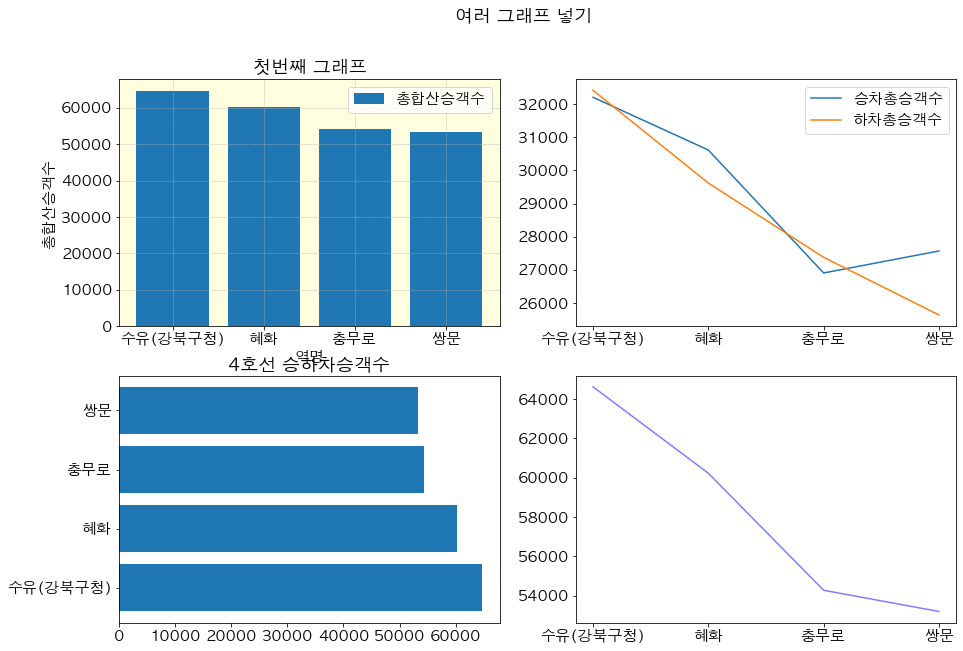

In [31]:
fig, axs = plt.subplots(2, 2, figsize=(15,10))   # 2 x 2 에 해당하는 Plot들을 생성
fig.suptitle('여러 그래프 넣기')



# 첫번째 그래프
axs[0,0].bar(df['역명'], df['총합산승객수'], label = '총합산승객수')  #[0.0]  = 영 콤마 영 위치의 그래프 ( 데이터설정)
axs[0,0].legend()  #범례
axs[0,0].set_title('첫번째 그래프')
axs[0,0].set(xlabel='역명', ylabel='총합산승객수')  # x,y 축 label
axs[0,0].set_facecolor('lightyellow')   # 전경색 지정
axs[0,0].grid(linestyle='--', linewidth=0.5)


# 두번째 그래프
axs[0,1].plot(df['역명'], df['승차총승객수'], label = '승차총승객수')
axs[0,1].plot(df['역명'], df['하차총승객수'], label = '하차총승객수')
axs[0,1].legend()


# 세번째 그래프
axs[1, 0].barh(df['역명'], df['총합산승객수'])
axs[1, 0].set_title('4호선 승하차승객수')


# 네번째 그래프 
axs[1,1].plot(df['역명'], df['총합산승객수'], color = 'b', alpha = 0.5)


